In [1]:
# Decision Tree Algorithm for Prediction the Comedy Show Attendance

# Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Encoding the data
from sklearn.preprocessing import LabelEncoder

In [2]:
# Global variables
separator = "_"*20
divider = "\n" + "*"*90 + "\n"

data = {
    "Age": [36, 42, 23, 52, 43, 44, 66, 35, 52, 35, 24, 18, 45],
    "Experience": [10, 12, 4, 4, 21, 14, 3, 14, 13, 5, 3, 3, 9],
    "Rank": [9, 4, 6, 4, 8, 5, 7, 9, 7, 9, 5, 7, 9],
    "Nationality": ["UK", "USA", "N", "USA", "USA", "UK", "N", "UK", "N", "N", "USA", "UK", "UK"],
    "Go": ["NO", "NO", "NO", "NO", "YES", "NO", "YES", "YES", "YES", "YES", "NO", "YES", "YES"]
}

df = pd.DataFrame(data)
print(f"{separator} DataFrame: {separator}\n{df}")

____________________ DataFrame: ____________________
    Age  Experience  Rank Nationality   Go
0    36          10     9          UK   NO
1    42          12     4         USA   NO
2    23           4     6           N   NO
3    52           4     4         USA   NO
4    43          21     8         USA  YES
5    44          14     5          UK   NO
6    66           3     7           N  YES
7    35          14     9          UK  YES
8    52          13     7           N  YES
9    35           5     9           N  YES
10   24           3     5         USA   NO
11   18           3     7          UK  YES
12   45           9     9          UK  YES


In [3]:
print(f"{separator} Missing Data Info: {separator}\n{df.isnull().sum()}")
print(f"{divider}\n{separator} Dataset Description: {separator}\n{df.describe()}")
print(f"{divider}\n{separator} Dataset Shape: {separator}{df.shape}")
print(f"{divider}\n{separator} DataFrame Summary: {separator}")
print(df.info())

____________________ Missing Data Info: ____________________
Age            0
Experience     0
Rank           0
Nationality    0
Go             0
dtype: int64

******************************************************************************************

____________________ Dataset Description: ____________________
             Age  Experience       Rank
count  13.000000   13.000000  13.000000
mean   39.615385    8.846154   6.846154
std    13.263600    5.727800   1.908147
min    18.000000    3.000000   4.000000
25%    35.000000    4.000000   5.000000
50%    42.000000    9.000000   7.000000
75%    45.000000   13.000000   9.000000
max    66.000000   21.000000   9.000000

******************************************************************************************

____________________ Dataset Shape: ____________________(13, 5)

******************************************************************************************

____________________ DataFrame Summary: ____________________
<class 'pandas

In [4]:
# Encoding 'Nationality'
le_nation = LabelEncoder()
# df['Nationality_encoded'] = LabelEncoder.fit_transform(df['Nationality'])
df["Nation_encoded"] = le_nation.fit_transform(df["Nationality"])

# Encoding target Go (YES = 1, NO = 0)
df["Go_encoded"] = LabelEncoder().fit_transform(df["Go"])

print(f"{separator} DataFrame after Encoding: {separator}\n{df}")
print(f"{divider}\n{separator} DataFrame Summary after Encoding: {separator}")
print(df.info())

____________________ DataFrame after Encoding: ____________________
    Age  Experience  Rank Nationality   Go  Nation_encoded  Go_encoded
0    36          10     9          UK   NO               1           0
1    42          12     4         USA   NO               2           0
2    23           4     6           N   NO               0           0
3    52           4     4         USA   NO               2           0
4    43          21     8         USA  YES               2           1
5    44          14     5          UK   NO               1           0
6    66           3     7           N  YES               0           1
7    35          14     9          UK  YES               1           1
8    52          13     7           N  YES               0           1
9    35           5     9           N  YES               0           1
10   24           3     5         USA   NO               2           0
11   18           3     7          UK  YES               1           1
12   45  

In [5]:
# Features (x) and Target (y)
x = df[["Age", "Experience", "Rank", "Nation_encoded"]]
y = df["Go_encoded"]

# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42) # We use test_size=0.2 when we have more than 100 data else we use 0.3

# Decision Tree model initialization
dt_model = DecisionTreeClassifier(random_state=42)

# Fitting the model
dt_model.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [6]:
# Making predition - y_pred
y_pred = dt_model.predict(x_test)

# Evaluate using accuracy_score, confusion_matrix and classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=0)

print(f"\n=> The accuracy: {accuracy}")
print(f"{divider}\n=> The Confusion Matrix:\n{conf_mat}")
print(f"{divider}\n=> The Classification Report:\n{report}")


=> The accuracy: 0.75

******************************************************************************************

=> The Confusion Matrix:
[[0 1]
 [0 3]]

******************************************************************************************

=> The Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.75      1.00      0.86         3

    accuracy                           0.75         4
   macro avg       0.38      0.50      0.43         4
weighted avg       0.56      0.75      0.64         4



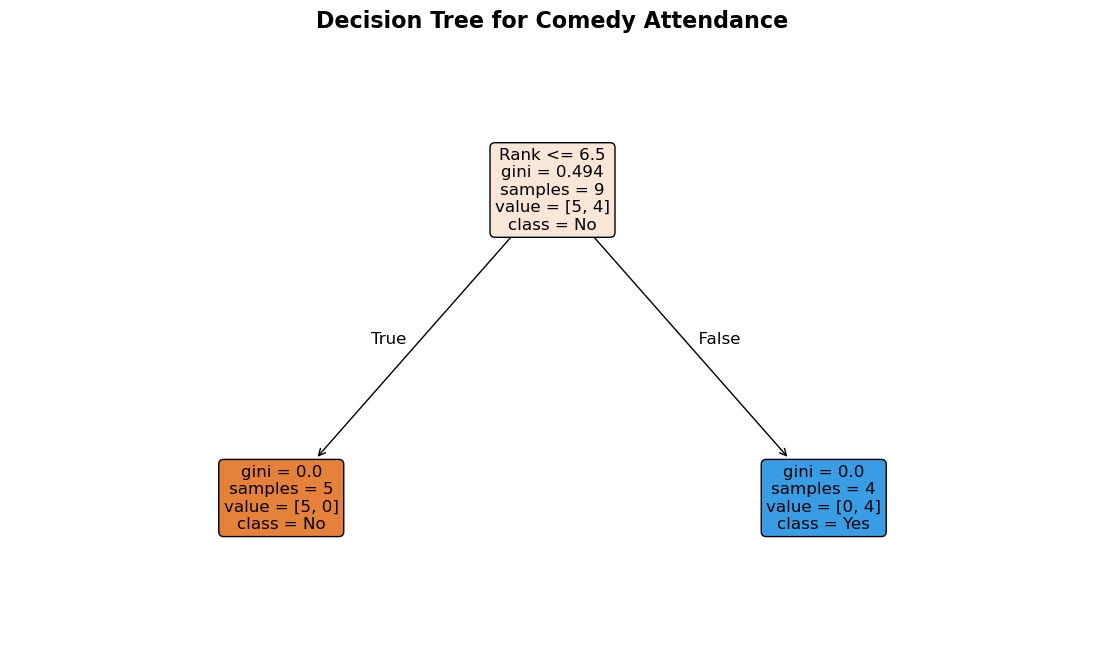

In [7]:
# Plotting Decision Tree
plt.figure(figsize=(14, 8))

plot_tree(
    dt_model, 
    feature_names=["Age", "Experience", "Rank", "Nation_encoded"], 
    class_names=["No", "Yes"], 
    filled=True, 
    rounded=True, 
    fontsize=12
)

plt.title("Decision Tree for Comedy Attendance", fontsize=16, fontweight="bold")
plt.show()